In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

## image contour crop

In [ ]:
size = 2000

img = cv2.imread("./test_data/1.jpg", cv2.IMREAD_COLOR)
#img = cv2.resize(img, (size,size), interpolation=cv2.INTER_AREA)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
# thr = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 77, 30)
# plt.imshow(thr)

kernel = np.ones((5, 5), np.uint8)
morph_img = cv2.morphologyEx(thr, cv2.MORPH_OPEN, kernel)

mask = np.zeros_like(morph_img) 
contours, _ = cv2.findContours(morph_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
cv2.drawContours(mask, contours, -1, (255, 255, 255), 3)

plt.imshow(mask)

indexs = np.where(morph_img == 255)

new_img = np.zeros((img.shape[0],img.shape[1],4))

for i in range(indexs[0].shape[0]):
#     print(i)
    new_img[indexs[0][i]][indexs[1][i]][:3] = img[indexs[0][i]][indexs[1][i]][0]
    new_img[indexs[0][i]][indexs[1][i]][3] = 255
#     print(new_img[indexs[0][i]][indexs[1][i]])

(y, x) = np.where(mask == 255)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = new_img[topy:bottomy+1, topx:bottomx+1]

cv2.imwrite("test2.png",out)


True

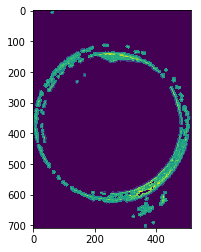

In [11]:
import numpy as np
import cv2
img = cv2.imread('./test_data/4.jpg',  0) # Read in your image
ret, thr = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
result = cv2.morphologyEx(thr, cv2.MORPH_OPEN, kernel)

# contours, _ = cv2.findContours(...) # Your call to find the contours using OpenCV 2.4.x
contours, _ = cv2.findContours(result, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Your call to find the contours

mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, contours, -1, (255,0,0), 10) # Draw filled contour in mask
out = np.zeros_like(img) # Extract out the object and place into output image
out[mask == 255] = img[mask == 255]

#print(contours)

# Now crop
(y, x) = np.where(mask == 255)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = out[topy:bottomy+1, topx:bottomx+1]

# Show the output image
plt.imshow(out)
cv2.imwrite("test.jpg",out)

## image color segmentation

In [ ]:
img = cv2.imread("./test_data/5.jpg", cv2.IMREAD_COLOR)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


rgb_green = np.uint8([[0,255,0]])
low_green = np.array([60,90,90])
high_green = np.array([90,255,255])

mask_green = cv2.inRange(hsv_img, low_green, high_green)

green_background = cv2.bitwise_and(hsv_img, hsv_img, mask = mask_green)

green_background_rgb = cv2.cvtColor(green_background, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(8,8))
plt.imshow(green_background_rgb)

In [ ]:
new_img = np.absolute(img - green_background_rgb)

plt.figure(figsize=(8,8))
plt.imshow(new_img)

In [ ]:
gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
morph_img = cv2.morphologyEx(thr, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(8,8))
plt.imshow(morph_img)

In [ ]:
indexs = np.where(morph_img == 255)

new_img = np.zeros((img.shape[0],img.shape[1],4))

for i in range(indexs[0].shape[0]):
#     print(i)
    new_img[indexs[0][i]][indexs[1][i]][:3] = img[indexs[0][i]][indexs[1][i]]
    new_img[indexs[0][i]][indexs[1][i]][3] = 255
#     print(new_img[indexs[0][i]][indexs[1][i]])

(y, x) = np.where(morph_img == 255)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = new_img[topy:bottomy+1, topx:bottomx+1]

cv2.imwrite("test2.png",out)

print(out.shape)

## crop dataset v1

In [ ]:
object_list = os.listdir("./test_data")

for one_object in object_list:

    img = cv2.imread("./test_data/" + one_object, cv2.IMREAD_COLOR)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


    rgb_green = np.uint8([[0,255,0]])
    low_green = np.array([60,90,90])
    high_green = np.array([90,255,255])

    mask_green = cv2.inRange(hsv_img, low_green, high_green)

    green_background = cv2.bitwise_and(hsv_img, hsv_img, mask = mask_green)

    green_background_rgb = cv2.cvtColor(green_background, cv2.COLOR_HSV2BGR)


    new_img = np.absolute(img - green_background_rgb)

    gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
    ret, thr = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

    kernel = np.ones((3, 3), np.uint8)
    morph_img = cv2.morphologyEx(thr, cv2.MORPH_OPEN, kernel)

    indexs = np.where(morph_img == 255)

    new_img = np.zeros((img.shape[0],img.shape[1],4))

    for i in range(indexs[0].shape[0]):
    #     print(i)
        new_img[indexs[0][i]][indexs[1][i]][:3] = img[indexs[0][i]][indexs[1][i]]
        new_img[indexs[0][i]][indexs[1][i]][3] = 255
    #     print(new_img[indexs[0][i]][indexs[1][i]])

    (y, x) = np.where(morph_img == 255)
    (topy, topx) = (np.min(y), np.min(x))
    (bottomy, bottomx) = (np.max(y), np.max(x))
    out = new_img[topy:bottomy+1, topx:bottomx+1]

    cv2.imwrite("object_v2/" + one_object[:-3] + "png",out)



## test red color

In [ ]:
img = cv2.imread("./test_data/10.jpg", cv2.IMREAD_COLOR)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


rgb_green = np.uint8([[0,255,0]])

# lower mask (0-10)
lower_red = np.array([0,0,60])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(hsv_img, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([175,0,60])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(hsv_img, lower_red, upper_red)

# join my masks
mask_red = mask0+mask1
mask = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
mask = cv2.bitwise_not(mask)
# mask_red = cv2.inRange(hsv_img, low_red, high_red)

background = cv2.bitwise_and(hsv_img, hsv_img, mask = mask)

background_rgb = cv2.cvtColor(background, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10,10))
plt.imshow(background_rgb)

In [ ]:
gray = cv2.cvtColor(background, cv2.COLOR_RGB2GRAY)

indexs = np.where(gray != 0)

new_img = np.zeros((img.shape[0],img.shape[1],4))

for i in range(indexs[0].shape[0]):
#     print(i)
    new_img[indexs[0][i]][indexs[1][i]][:3] = img[indexs[0][i]][indexs[1][i]]
    new_img[indexs[0][i]][indexs[1][i]][3] = 255
#     print(new_img[indexs[0][i]][indexs[1][i]])

(y, x) = np.where(gray != 0)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = new_img[topy:bottomy+1, topx:bottomx+1]

cv2.imwrite("test2.png",out)

print(out.shape)

## test blue color

In [ ]:
img = cv2.imread("./test_data/11.jpg", cv2.IMREAD_COLOR)
# img = cv2.resize(img,None,fx=0.5,fy=0.5)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# lower mask (0-10)
lower_blue = np.array([100,40,40])
upper_blue = np.array([140,255,255])
mask = cv2.inRange(hsv_img, lower_blue, upper_blue)

mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
mask = cv2.bitwise_not(mask)

background = cv2.bitwise_and(hsv_img, hsv_img, mask = mask)
# plt.figure(figsize=(10,10))
# plt.imshow(mask)

background_rgb = cv2.cvtColor(background, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10,10))
plt.imshow(background_rgb)

In [ ]:
gray = cv2.cvtColor(background, cv2.COLOR_RGB2GRAY)

indexs = np.where(gray != 0)

new_img = np.zeros((img.shape[0],img.shape[1],4))

for i in range(indexs[0].shape[0]):
#     print(i)
    new_img[indexs[0][i]][indexs[1][i]][:3] = img[indexs[0][i]][indexs[1][i]]
    new_img[indexs[0][i]][indexs[1][i]][3] = 255
#     print(new_img[indexs[0][i]][indexs[1][i]])

(y, x) = np.where(gray != 0)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = new_img[topy:bottomy+1, topx:bottomx+1]

cv2.imwrite("test2.png",out)

print(out.shape)

## Data Contour Crop

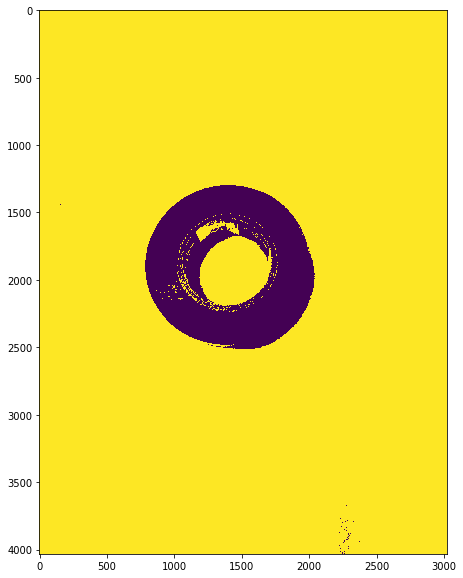

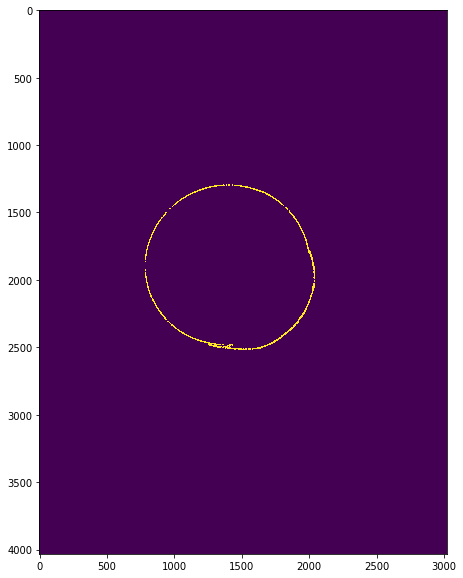

In [57]:
img = cv2.imread('./test_data/15.jpg',  0) # Read in your image
ret, thr = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
# ret, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(10,10))
plt.imshow(thr)


# kernel = np.ones((3, 3), np.uint8)
# result = cv2.morphologyEx(thr, cv2.MORPH_OPEN, kernel)

# # contours, _ = cv2.findContours(...) # Your call to find the contours using OpenCV 2.4.x
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Your call to find the contours

for ct in contours:
    x,y,w,h = cv2.boundingRect(ct)
#     print(w,h)
    
    if w > 900 and w < 2000 and h > 900 and h < 2000:
        mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
#         cv2.fillPoly(mask, pts=ct, color=(255,255,255))
        cv2.drawContours(mask, ct, -1, (255,255,255), 10) # Draw filled contour in mask
        out = np.zeros_like(img) # Extract out the object and place into output image
        out[mask == 255] = img[mask == 255]
# #print(contours)

# # Now crop
(y, x) = np.where(mask == 255)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = out[topy:bottomy+1, topx:bottomx+1]

# Show the output image
plt.figure(figsize=(10,10))
plt.imshow(mask)
# cv2.imwrite("test.jpg",out)